Multilayer Perceptron Regression
Given the number of passengers this month, what is the number of passengers next month.


DataSource: https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import math
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

In [259]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [260]:
def get_data():
    data = pd.read_csv('../static/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
    data = data.values
    data = data.astype('float32')
    return data

In [261]:
# split into train and test sets
def split_data(data):
    train_size = int(len(data) * 0.67)
    test_size = len(data) - train_size
    train, test = data[0:train_size,:], data[train_size:len(data),:]
    print(len(train), len(test))
    return train, test

In [262]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [263]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [264]:

# create and fit Multilayer Perceptron model
def fit_model(trainX, trainY):
    model = Sequential()
    model.add(Dense(8, input_dim=look_back, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=2)
    return model
    

In [265]:
# Estimate model performance
def performance(trainX, trainY, testX, testY, model, verbose=0):
    trainScore = model.evaluate(trainX, trainY, verbose=0)
    print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(testX, testY, verbose=0)
    print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    

In [266]:
# generate predictions for training
def P_training(trainX,testX):
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    return trainPredict, testPredict
    

In [267]:
# shift train predictions for plotting
def train_plot(data, trainPredict):
    trainPredictPlot = numpy.empty_like(data)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    return trainPredictPlot


In [268]:
# shift test predictions for plotting
def shifting(data, trainPredict, testPredict):
    testPredictPlot = numpy.empty_like(data)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict
    return testPredictPlot

In [269]:
# plot baseline and predictions
def  plot_predictions(testPredictPlot, trainPredictPlot,data):
    plt.plot(data)
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()
    

In [270]:
def main():
    data = get_data()
    train, test = split_data(data)
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    model= fit_model(trainX, trainY)
    performance(trainX, trainY, testX, testY, model)
    trainPredict, testPredict = P_training(trainX, testX)
    trainPredictPlot = train_plot(data, trainPredict)
    testPredictPlot = shifting(data, trainPredict, testPredict)
    plotPredict = plot_predictions(testPredictPlot, trainPredictPlot,data)

96 48
Epoch 1/20
 - 0s - loss: 120689.5462
Epoch 2/20
 - 0s - loss: 81000.7405
Epoch 3/20
 - 0s - loss: 52983.6255
Epoch 4/20
 - 0s - loss: 33206.7958
Epoch 5/20
 - 0s - loss: 20069.4264
Epoch 6/20
 - 0s - loss: 11634.0213
Epoch 7/20
 - 0s - loss: 6550.4787
Epoch 8/20
 - 0s - loss: 3584.0312
Epoch 9/20
 - 0s - loss: 1992.1041
Epoch 10/20
 - 0s - loss: 1187.3029
Epoch 11/20
 - 0s - loss: 805.0491
Epoch 12/20
 - 0s - loss: 645.3452
Epoch 13/20
 - 0s - loss: 574.0619
Epoch 14/20
 - 0s - loss: 549.9544
Epoch 15/20
 - 0s - loss: 540.2350
Epoch 16/20
 - 0s - loss: 537.6367
Epoch 17/20
 - 0s - loss: 544.3520
Epoch 18/20
 - 0s - loss: 546.4999
Epoch 19/20
 - 0s - loss: 538.1457
Epoch 20/20
 - 0s - loss: 538.4690
Train Score: 534.14 MSE (23.11 RMSE)
Test Score: 2359.11 MSE (48.57 RMSE)


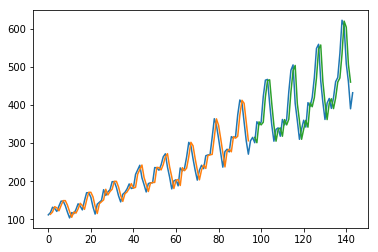

In [271]:
main()

# Multilayer Perceptron Using the Window Method

In [272]:

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [273]:
# create and fit Multilayer Perceptron model
def fit_model(trainX, trainY):
    model = Sequential()
    model.add(Dense(12, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2)
    return model

In [274]:
main()

96 48
Epoch 1/100
 - 1s - loss: 68639.2480
Epoch 2/100
 - 1s - loss: 31292.9742
Epoch 3/100
 - 1s - loss: 10758.9111
Epoch 4/100
 - 1s - loss: 3610.6327
Epoch 5/100
 - 1s - loss: 1470.7598
Epoch 6/100
 - 1s - loss: 944.2538
Epoch 7/100
 - 1s - loss: 865.1730
Epoch 8/100
 - 1s - loss: 856.4237
Epoch 9/100
 - 1s - loss: 849.9955
Epoch 10/100
 - 1s - loss: 845.4096
Epoch 11/100
 - 1s - loss: 834.6560
Epoch 12/100
 - 1s - loss: 839.7121
Epoch 13/100
 - 1s - loss: 818.9567
Epoch 14/100
 - 1s - loss: 820.8691
Epoch 15/100
 - 1s - loss: 810.1951
Epoch 16/100
 - 1s - loss: 806.2562
Epoch 17/100
 - 1s - loss: 799.0327
Epoch 18/100
 - 1s - loss: 800.5762
Epoch 19/100
 - 1s - loss: 785.0853
Epoch 20/100
 - 1s - loss: 780.4010
Epoch 21/100
 - 1s - loss: 774.3226
Epoch 22/100
 - 1s - loss: 796.2753
Epoch 23/100
 - 1s - loss: 774.6287
Epoch 24/100
 - 1s - loss: 766.0000
Epoch 25/100
 - 1s - loss: 753.2239
Epoch 26/100
 - 1s - loss: 756.5596
Epoch 27/100
 - 1s - loss: 745.0094
Epoch 28/100
 - 1s - lo

ValueError: Error when checking input: expected dense_5_input to have shape (1,) but got array with shape (3,)